<a href="https://colab.research.google.com/github/hashil7/Titanic-Survival-Prediction/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import necessary libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

Read CSV file and display information

In [ ]:
df = pd.read_csv("titanic.csv")
print("Dataframe information")
print(df.info())

Dataframe information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


Display first 10 rows of Data

In [ ]:
print("\nFirst 10 rows of Data")
pd.set_option('display.width', None)
print(df.head(10))


First 10 rows of Data
   Survived   Age  SibSp  Parch     Fare  Sex_female  Sex_male  Pclass_1  Pclass_2  Pclass_3
0         0  22.0      1      0   7.2500           0         1         0         0         1
1         1  38.0      1      0  71.2833           1         0         1         0         0
2         1  26.0      0      0   7.9250           1         0         0         0         1
3         1  35.0      1      0  53.1000           1         0         1         0         0
4         0  35.0      0      0   8.0500           0         1         0         0         1
5         0  29.7      0      0   8.4583           0         1         0         0         1
6         0  54.0      0      0  51.8625           0         1         1         0         0
7         0   2.0      3      1  21.0750           0         1         0         0         1
8         1  27.0      0      2  11.1333           1         0         0         0         1
9         1  14.0      1      0  30.0708       

Display first 5 rows of the data having the given columns only.
‘PassengerID’, ‘Name’, ‘Age’, ‘Sex’


In [ ]:
selected_cols  = ['PassengerId','Name','Age','Sex']
print('\nFirst 5 rows of selected columns')
print(df[selected_cols].head())


First 5 rows of selected columns
   PassengerId                                               Name   Age     Sex
0            1                            Braund, Mr. Owen Harris  22.0    male
1            2  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0  female
2            3                             Heikkinen, Miss. Laina  26.0  female
3            4       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0  female
4            5                           Allen, Mr. William Henry  35.0    male


Plot the count of survived passengers.

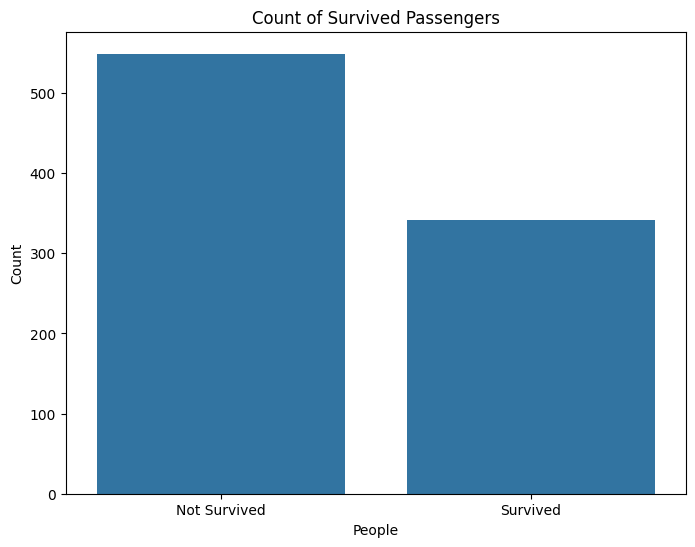

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(data = df, x='Survived')
plt.title('Count of Survived Passengers')
plt.xlabel('People')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Not Survived', 'Survived'])
plt.show()

Plot Histogram of Age Column

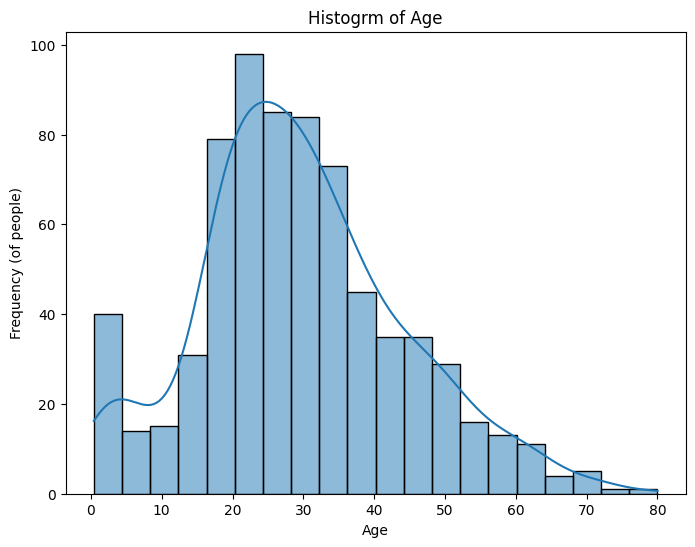

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(data=df,x='Age',bins = 20,kde=True)
plt.title('Histogrm of Age')
plt.xlabel('Age')
plt.ylabel('Frequency (of people)')
plt.show()

Drop the following unnecessary columns.
‘PassengerID’,’Name’, ‘Ticket’, ‘Cabin’, ‘Embarked’

In [ ]:
un_cols = ['PassengerId','Name','Ticket','Cabin','Embarked']
df.drop(columns=un_cols, axis=1,inplace=True)
print(df.head())

   Survived  Pclass     Sex   Age  SibSp  Parch     Fare
0         0       3    male  22.0      1      0   7.2500
1         1       1  female  38.0      1      0  71.2833
2         1       3  female  26.0      0      0   7.9250
3         1       1  female  35.0      1      0  53.1000
4         0       3    male  35.0      0      0   8.0500


Replace NaN values in 'Age' column with mean value of age.

Count number of NaN values

In [ ]:
nan_count = df['Age'].isna().sum()
print('NaN count: ',nan_count)

NaN count:  177


Calculate mean age

In [ ]:
mean_age  =round(df['Age'].mean(),2)
print('Mean age: ',mean_age)

Mean age:  29.7


Replace NaN values with mean value

In [ ]:
df['Age'].fillna(mean_age,inplace=True)

Convert entries in'Sex' and 'Pclass' to numerical values, drop the first attribute and concatenate the results

In [ ]:
df = pd.get_dummies(df, columns=['Sex', 'Pclass'], drop_first=True)
df=df.astype(int)
print(df.head())

   Survived  Age  SibSp  Parch  Fare  Sex_male  Pclass_2  Pclass_3
0         0   22      1      0     7         1         0         1
1         1   38      1      0    71         0         0         0
2         1   26      0      0     7         0         0         1
3         1   35      1      0    53         0         0         0
4         0   35      0      0     8         1         0         1


Rename Columns

In [ ]:
df.rename(columns={'Sex_male':'sex'},inplace=True)
print(df.head())

   Survived  Age  SibSp  Parch  Fare  sex  Pclass_2  Pclass_3
0         0   22      1      0     7    1         0         1
1         1   38      1      0    71    0         0         0
2         1   26      0      0     7    0         0         1
3         1   35      1      0    53    0         0         0
4         0   35      0      0     8    1         0         1


Make a ratio of 30% and 70% for test and train dataset.

In [ ]:
#Drop the last column (output) to get input 'X'
X=df.drop(columns=['Survived'])
y=df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

Apply Logistic Regression and Neural Networks Classifier

In [ ]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train,y_train)
y_pred_logistic = logistic_model.predict(X_test)
nn_classifier = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
nn_classifier.fit(X_train, y_train)
y_pred_nn = nn_classifier.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Plot Confusion Matrices

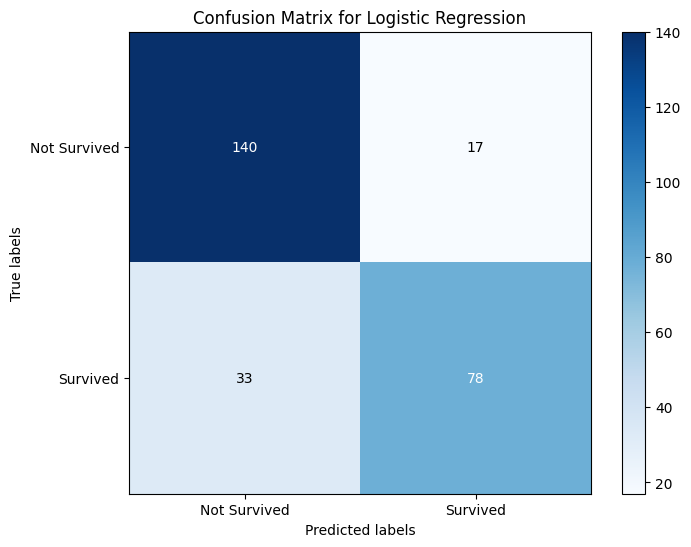

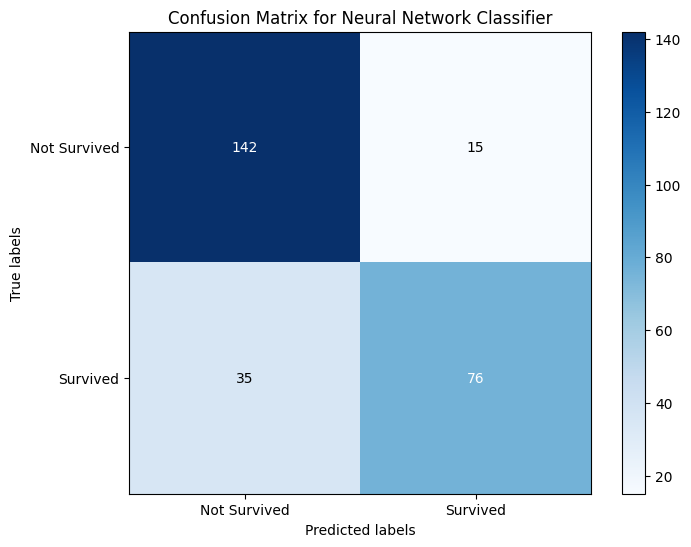

In [ ]:
cm_logistic = confusion_matrix(y_test, y_pred_logistic)
plt.figure(figsize=(8, 6))
plt.imshow(cm_logistic, cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Logistic Regression')
plt.colorbar()
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.yticks([0, 1], ['Not Survived', 'Survived'])
for i in range(2):
    for j in range(2):
        plt.text(j, i, format(cm_logistic[i, j], 'd'), ha="center", va="center", color="white" if cm_logistic[i, j] > np.max(cm_logistic) / 2 else "black")
plt.show()

cm_nn = confusion_matrix(y_test, y_pred_nn)
plt.figure(figsize=(8, 6))
plt.imshow(cm_nn, cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Neural Network Classifier')
plt.colorbar()
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.yticks([0, 1], ['Not Survived', 'Survived'])
for i in range(2):
    for j in range(2):
        plt.text(j, i, format(cm_nn[i, j], 'd'), ha="center", va="center", color="white" if cm_nn[i, j] > np.max(cm_nn) / 2 else "black")
plt.show()

Find Precision, Recall, F1score, and Accuracy.

In [ ]:
precision_logistic = precision_score(y_test, y_pred_logistic)
recall_logistic = recall_score(y_test, y_pred_logistic)
f1_logistic = f1_score(y_test, y_pred_logistic)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)

print("Logistic Regression Metrics:")
print("Precision:", precision_logistic)
print("Recall:", recall_logistic)
print("F1-score:", f1_logistic)
print("Accuracy:", accuracy_logistic)
print("\n")
precision_nn = precision_score(y_test, y_pred_nn)
recall_nn = recall_score(y_test, y_pred_nn)
f1_nn = f1_score(y_test, y_pred_nn)
accuracy_nn = accuracy_score(y_test, y_pred_nn)

print("Neural Network Classifier Metrics:")
print("Precision:", precision_nn)
print("Recall:", recall_nn)
print("F1-score:", f1_nn)
print("Accuracy:", accuracy_nn)

Logistic Regression Metrics:
Precision: 0.8210526315789474
Recall: 0.7027027027027027
F1-score: 0.7572815533980582
Accuracy: 0.8134328358208955


Neural Network Classifier Metrics:
Precision: 0.8351648351648352
Recall: 0.6846846846846847
F1-score: 0.7524752475247525
Accuracy: 0.8134328358208955
